# A1.3 Regresión lineal múltiple


1. Se importan los datos del archivo “NASA.csv” al ambiente de trabajo. Se revisan las dimensiones
del data frame y se imprime en consola tanto dichas dimensiones como las primeras 15 filas
de datos.

In [3]:
import pandas as pd

# Se importan los datos del archivo
file_path = 'A1.3 NASA.csv'
try:
    df = pd.read_csv(file_path, sep=',')
except FileNotFoundError:
    print(f"El archivo '{file_path}' no fue encontrado.")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

# Se revisan las dimensiones del DataFrame
n_rows = df.shape[0]
n_columns = df.shape[1]
print(f"Número de filas: {n_rows}")
print(f"Número de columnas: {n_columns}")

# Se imprimen las primeras 15 filas de datos
print(df.head(15))
    

Número de filas: 1503
Número de columnas: 6
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14         

2. Se separan los datos del DataFrame en datos de entrenamiento y datos de prueba con una proporción 70/30. Teniendo en cuenta que el 70% de los datos se usarán para entrenar el modelo y el resto para validar sus resultados. Asegurando también que la partición sea aleatoria. 

In [5]:
from sklearn.model_selection import train_test_split

# Separar en entrenamiento (70%) y prueba (30%), asegurando aleatoriedad
train_data, test_data = train_test_split(df, test_size=0.30, random_state=42)

# Imprimir dimensiones de los conjuntos 
print(f"Dimensiones del conjunto de entrenamiento: {train_data.shape}")
print(f"Dimensiones del conjunto de prueba: {test_data.shape}")

# Verificar si la suma de ambos conjuntos equivale al tamaño del DataFrame original
total_data_rows = train_data.shape[0] + test_data.shape[0]
if total_data_rows == n_rows and train_data.shape[1] == n_columns and test_data.shape[1] == n_columns:
    print("Las dimensiones de los subconjuntos si pertenecen al conjunto original")
else:
    print("Las dimensiones de los subconjuntos no cuadran con las del conjunto original")

Dimensiones del conjunto de entrenamiento: (1052, 6)
Dimensiones del conjunto de prueba: (451, 6)
Las dimensiones de los subconjuntos si pertenecen al conjunto original


3. Se entrena un modelo de regresión lineal múltiple, para que las primeras 5 variables del sistema intenten predecir a la sexta, **presión**. Tratando de predecir el aerodinamismo, medido como la presión sonora detectada. Se imprime en pantalla un resumen del modelo, donde se muestre claramente el coeficiente estimado de cada variable, así como su p-value asociado, entre otras cosas.

In [7]:
import statsmodels.api as sm
import numpy as np 

# Definir variables independientes y dependientes
X = df[['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor']]
Y = df['presion']

# Agregar la constante para incluir el intercepto en el modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
modelo = sm.OLS(Y, X).fit()

# Imprimir el resumen del modelo
print(modelo.summary())

# Imprimir los valores exactos de los p-values y coeficientes 
print("\nValores exactos de los p-values:")
print(modelo.pvalues)
print("\nCoeficientes del modelo:")
print(modelo.params)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     318.8
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          1.15e-232
Time:                        12:12:28   Log-Likelihood:                -4490.1
No. Observations:                1503   AIC:                             8992.
Df Residuals:                    1497   BIC:                             9024.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.8338      0.545    243.866      0.0

4. De acuerdo a la tabla de resultados, los resultados de las variables son los siguientes:
   
   <table>
       <thead>
           <tr>
               <td><strong>Variable</strong></td>
               <td><strong>Coeficiente</strong></td>
               <td><strong>p-value exacto</strong></td>
               <td><strong>Interpretación</strong></td>
           </tr>
       </thead>
       <tbody>
           <tr>
               <td>B0</td>
               <td>132.833806</td>
               <td>0.000000e+00</td>
               <td>Valor base de presión cuando todas las variables son 0</td>
           </tr>
           <tr>
               <td>Frecuencia</td>
               <td>-0.001282</td>
               <td>6.421817e-159</td>
               <td>A mayor frecuencia, menor presión</td>
           </tr>
           <tr>
               <td>Ángulo</td>
               <td>-0.421912</td>
               <td>1.923376e-26</td>
               <td>Un aumento disminuye la presión</td>
           </tr>
           <tr>
               <td>Longitud</td>
               <td>-35.688001</td>
               <td>2.286839e-92</td>
               <td>Tiene un impacto negativo significativo en la presión</td>
           </tr>
           <tr>
               <td>Velocidad</td>
               <td>0.099854</td>
               <td>4.340636e-33</td>
               <td>A mayor velocidad, mayor presión</td>
           </tr> 
           <tr>
               <td>Espesor</td>
               <td>-147.300519</td>
               <td>4.617244e-22</td>
               <td>Tiene un gran efecto negativo en la presión</td>
           </tr>
       </tbody>
   </table>

   Como todas las variables tienen p-values muy bajos (inferiores a 0.05), todas son significativas para predecir la presión. Sin embargo, las que consideraría como mas significativas serían las siguientes:
   - **Longitud**: (Coef -35.689) Tiene un gran impacto negativo en la presión (entre mas longitud, menos presión).
   - **Velocidad**: (Coef 0.0998) Tiene un impacto positivo en la presión (entre mas velocidad, mas presión).
   - **Espesor**: (Coef -147.3) Es la más influyente al reducir la presión (por su coeficiente), entre más espesor menos presión, a mi criterio la más importante del modelo.  

5. Se calcula el residual standard error y la 𝑅<sup>2</sup> del modelo, tanto para los datos de
entrenamiento como para los datos de validación. 

In [10]:
# Función para calcular el Residual Standard Error (RSE)
def calcular_rse(y_real, y_pred, num_variables):
    rss = np.sum((y_real - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_real) - num_variables))
    return rse

# Función para calcular R2
def calcular_r2(y_real, y_pred): 
    tss = np.sum((y_real - np.mean(y_real)) ** 2)
    rss = np.sum((y_real - y_pred) ** 2)
    r2 = 1 - (rss / tss)
    return r2

# Separar los datos en entrenamiento (70%) y validación (30%) de forma aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Ajustar el modelo en los datos de entrenamiento
model_train = sm.OLS(y_train, X_train).fit()

# Predecir valores en los conjuntos de entrenamiento y validación
y_train_pred = model_train.predict(X_train)
y_test_pred = model_train.predict(X_test)

# Calcular RSE y R2 para entrenamiento y validación
num_variables = X_train.shape[1]
rse_train = calcular_rse(y_train, y_train_pred, num_variables)
rse_test = calcular_rse(y_test, y_test_pred, num_variables)
r2_train = calcular_r2(y_train, y_train_pred)
r2_test = calcular_r2(y_test, y_test_pred)

# Imprimir resultados
print(f"Residual Standard Error (RSE) - Entrenamiento: {rse_train}")
print(f"Residual Standard Error (RSE) - Validación: {rse_test}")
print(f"R^2 - Entrenamiento: {r2_train}")
print(f"R^2 - Validación: {r2_test}")


Residual Standard Error (RSE) - Entrenamiento: 4.791436345798008
Residual Standard Error (RSE) - Validación: 4.899718884114829
R^2 - Entrenamiento: 0.5214416938715568
R^2 - Validación: 0.4982726587937777


6. Se genera una gráfica de dispersión que cuente con el valor real de Y (la presión sonora) para el conjunto de datos
de validación en el eje x, y que cuente con el valor estimado de Y, de acuerdo al modelo,
para el mismo conjunto de datos en el eje y.

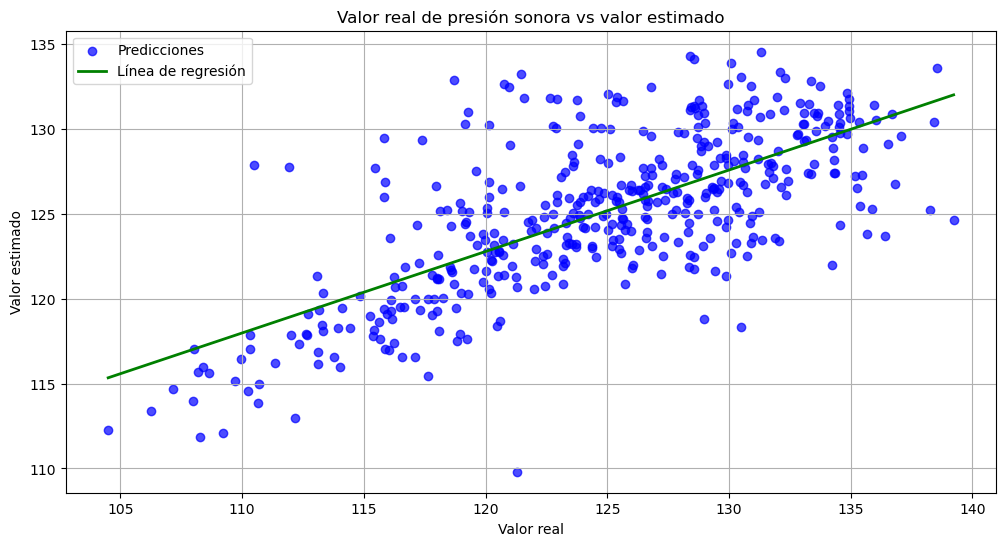

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

# Crear la gráfica de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, color='blue', marker='o', alpha=0.7, label="Predicciones")

# Ajustar una regresión lineal a los datos reales vs predichos
coef = np.polyfit(y_test, y_test_pred, 1)  # Ajuste de regresión lineal (grado 1)
tendencia = np.poly1d(coef)  # Obtener la ecuación de la recta

# Dibujar la línea de regresión real
x_vals = np.linspace(min(y_test), max(y_test), 100)  # Rango de valores reales
plt.plot(x_vals, tendencia(x_vals), color='green', linestyle='-', linewidth=2, label="Línea de regresión")

# Etiquetas y título
plt.title('Valor real de presión sonora vs valor estimado')
plt.xlabel('Valor real')
plt.ylabel('Valor estimado')
plt.grid(True)
plt.legend()
plt.show()


In [25]:
print(tendencia)

 
0.48 x + 65.18


El modelo tiene una **pendiente de 0.48**, casi la mitad de lo que debería de estar (**pendiente de 1**) para que los valores reales y los valores estimados sean identicos, a pesar de esto, parece que el modelo se ajusta bien, sin embargo valdría la pena analizar también otros modelos, probar con más variables predictoras o revisar la colineabilidad entre variables independientes.  

**Firma de honor:** Doy mi palabra de que he realizado esta actividad con integridad academica.